<a href="https://colab.research.google.com/github/Yashsethi24/Regression-diamond-prices/blob/main/End_to_End_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1 – End-to-end Machine Learning project**

Data Science Lifecycle

# Step 1: Problem Formulation

The diamond industry is growing ~5% year on year, and the expertise required to define accurate prices has been limited to a few gemologists, making the process prone to discrepancies and inefficiencies. To maintain fair commerce and buyer trust, there needs to be a system that can accurately determine the price of a diamond based on various elements, including physical traits and quality parameters such as carat, cut, color, clarity, and dimensions (length, width, and depth).

The objective of this project is to create a machine learning model that uses a diamond's carat, cut, color, clarity, and dimensions (length, width, and depth) to predict its price.



# Step 2: Get the Data

In [421]:
import pandas as pd
import sklearn

data = pd.read_csv('/content/diamonds.csv')

In [422]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [423]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [424]:
# Rename columns
data.rename(columns={'depth':'depth_perc'}, inplace=True)
data.rename(columns={'x': 'length', 'y': 'width', 'z': 'depth'}, inplace=True)

In [425]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth_perc', 'table', 'price',
       'length', 'width', 'depth'],
      dtype='object')

## Take a Quick Look at the Data Structure

In [426]:
data.head()

,carat,cut,color,clarity,depth_perc,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Description of columns


*   price - price in US dollars
*   carat - weight of the diamond
*   cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   color - diamond colour, from J (worst) to D (best)
*   clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
*   length - length (in mm)
*   width - width (in mm)
*   depth - depth (in mm)
*   depth_perc - total depth percentage {z / mean(x, y) = 2 * z / (x + y)}
*   table - width of top of diamond relative to widest point

# Step 3: Data Exploration

# Look at the data types and null values in data

In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53940 non-null  float64
 1   cut         53940 non-null  object 
 2   color       53940 non-null  object 
 3   clarity     53940 non-null  object 
 4   depth_perc  53940 non-null  float64
 5   table       53940 non-null  float64
 6   price       53940 non-null  int64  
 7   length      53940 non-null  float64
 8   width       53940 non-null  float64
 9   depth       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### ***Observation:*** No column has null value and we have three object columns.

# Look at the value counts for each 'object' column

In [428]:
data["cut"].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [429]:
data["color"].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [430]:
data["clarity"].value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


# Distribution of values in non-object columns

In [431]:
data.describe()

,carat,depth_perc,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


As we can see from the dataset, there are cases where length, width or depth are zero, which are anomalies. Hence, dropping them from the dataset.  

In [432]:
data = data.drop(data[data["length"]==0].index)
data = data.drop(data[data["width"]==0].index)
data = data.drop(data[data["depth"]==0].index)
data.shape

(53920, 10)

### Code to save the figures as high-res PNGs for the book

In [433]:
# extra code – code to save the figures as high-res PNGs for the book
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

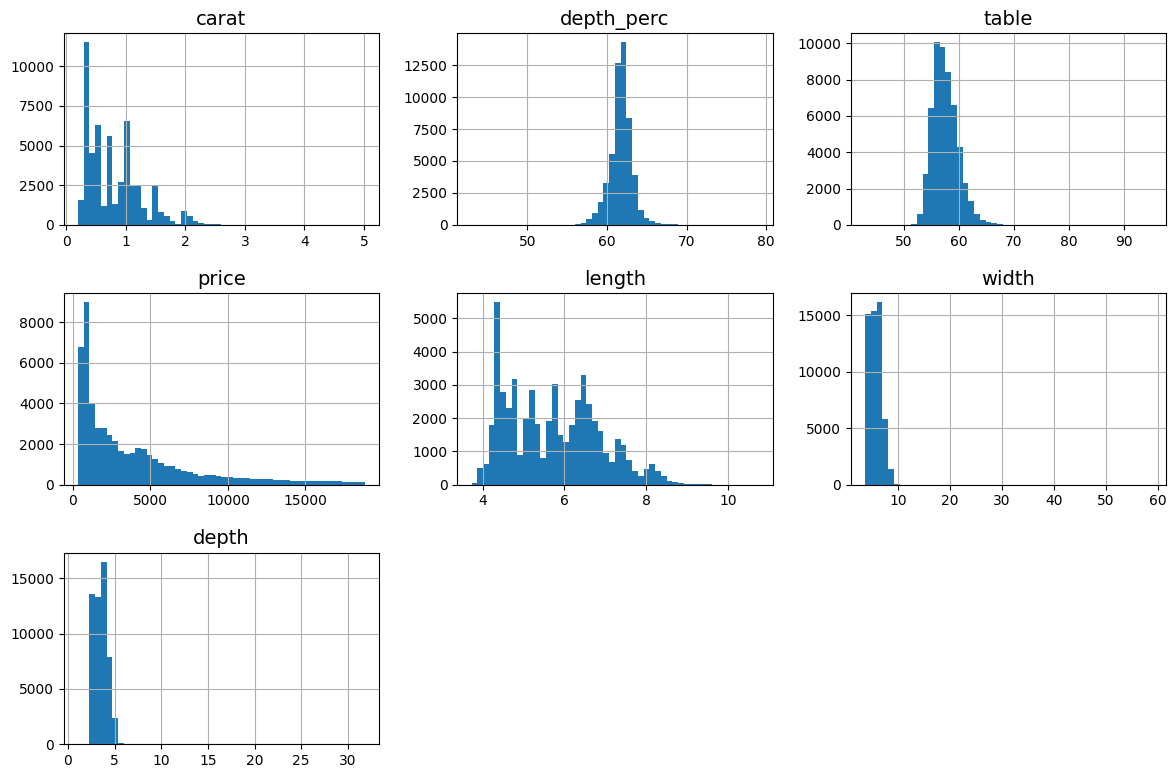

In [434]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

# Bivariate Analysis using Scatter Plots

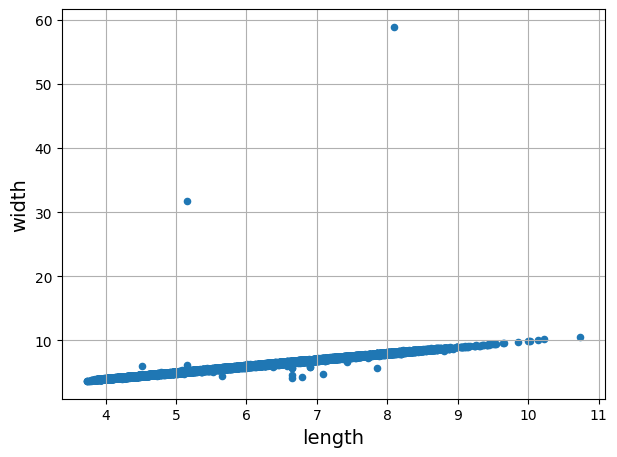

In [441]:
data.plot(kind="scatter", x="length", y="width", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

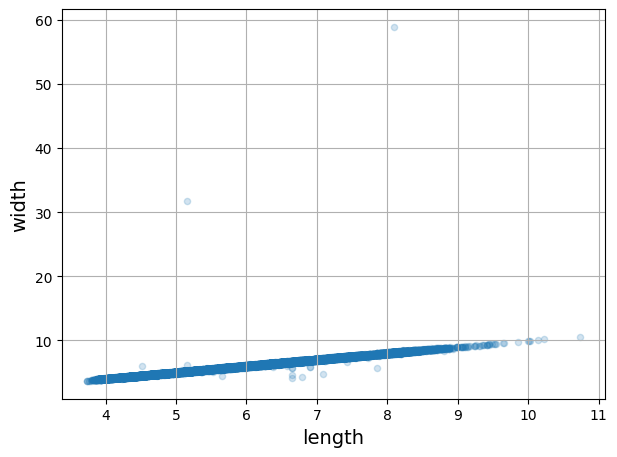

In [442]:
data.plot(kind="scatter", x="length", y="width", grid=True,alpha = 0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

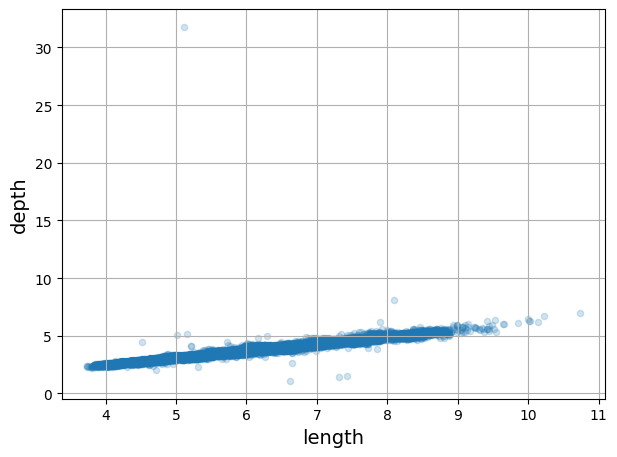

In [443]:
data.plot(kind="scatter", x="length", y="depth", grid=True,alpha = 0.2)
save_fig("better_visualization_plot_len_dep")  # extra code
plt.show()

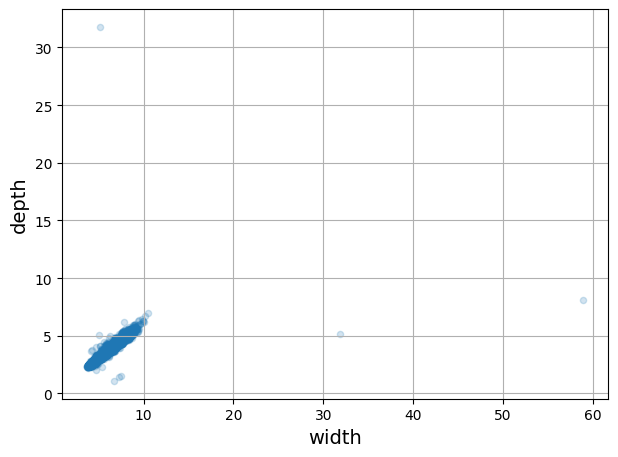

In [444]:
data.plot(kind="scatter", x="width", y="depth", grid=True,alpha = 0.2)
save_fig("better_visualization_plot_width_dep")  # extra code
plt.show()

# Looking at price distribution by wrt multiple dimensions

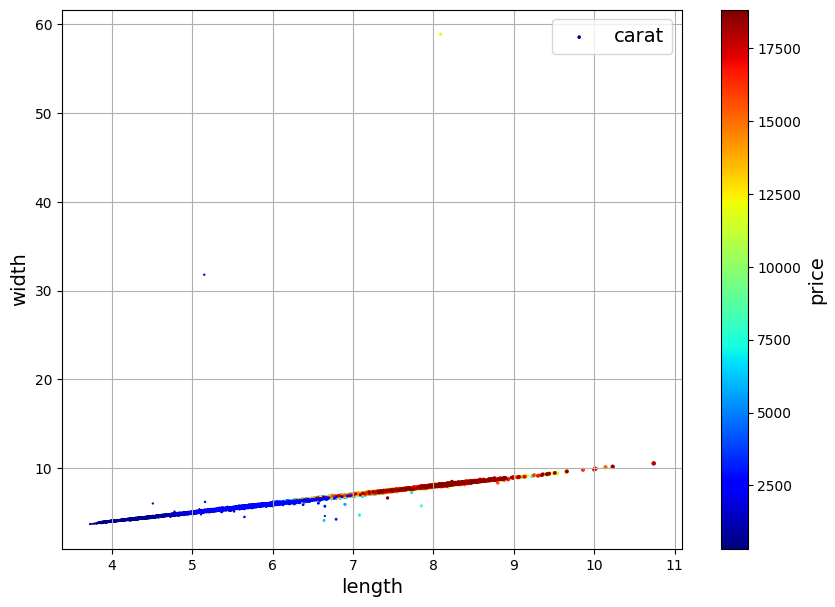

In [445]:
data.plot(kind="scatter", x="length", y="width", grid=True,
             s=data["carat"] , label="carat",
             c="price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

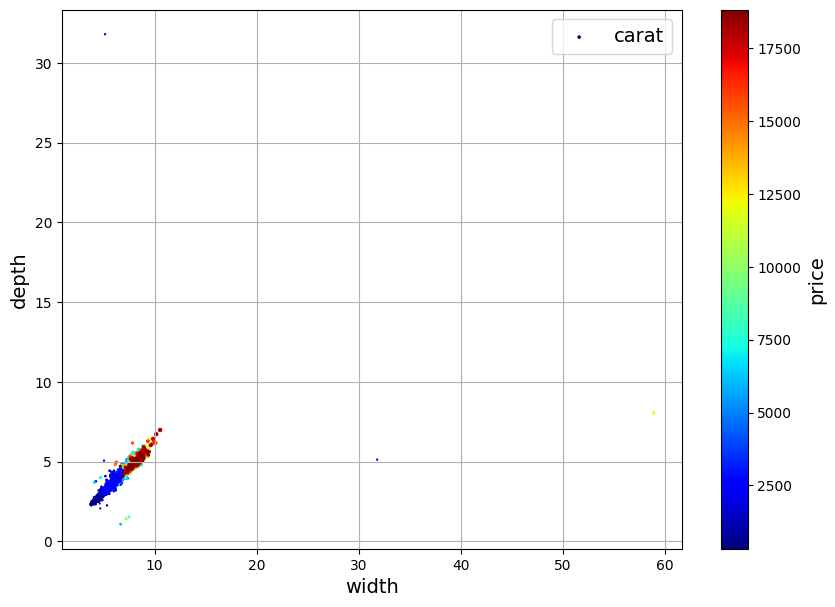

In [446]:
data.plot(kind="scatter", x="width", y="depth", grid=True,
             s=data["carat"] , label="carat",
             c="price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

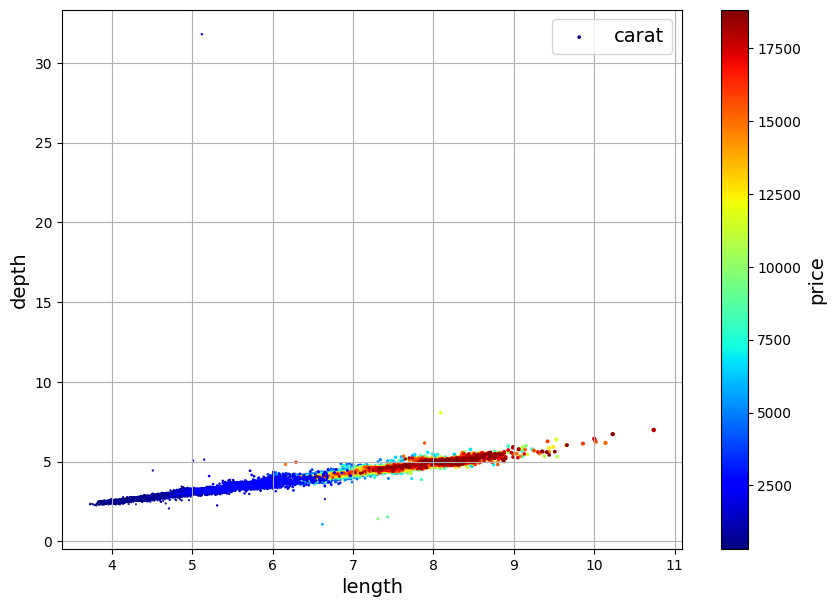

In [447]:
data.plot(kind="scatter", x="length", y="depth", grid=True,
             s=data["carat"] , label="carat",
             c="price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

## Looking for Correlations

In [448]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

,price
price,1.000000
carat,0.921592
length,0.887231
depth,0.868206
width,0.867864
table,0.127245
depth_perc,-0.010729


### Visualizing Correlations

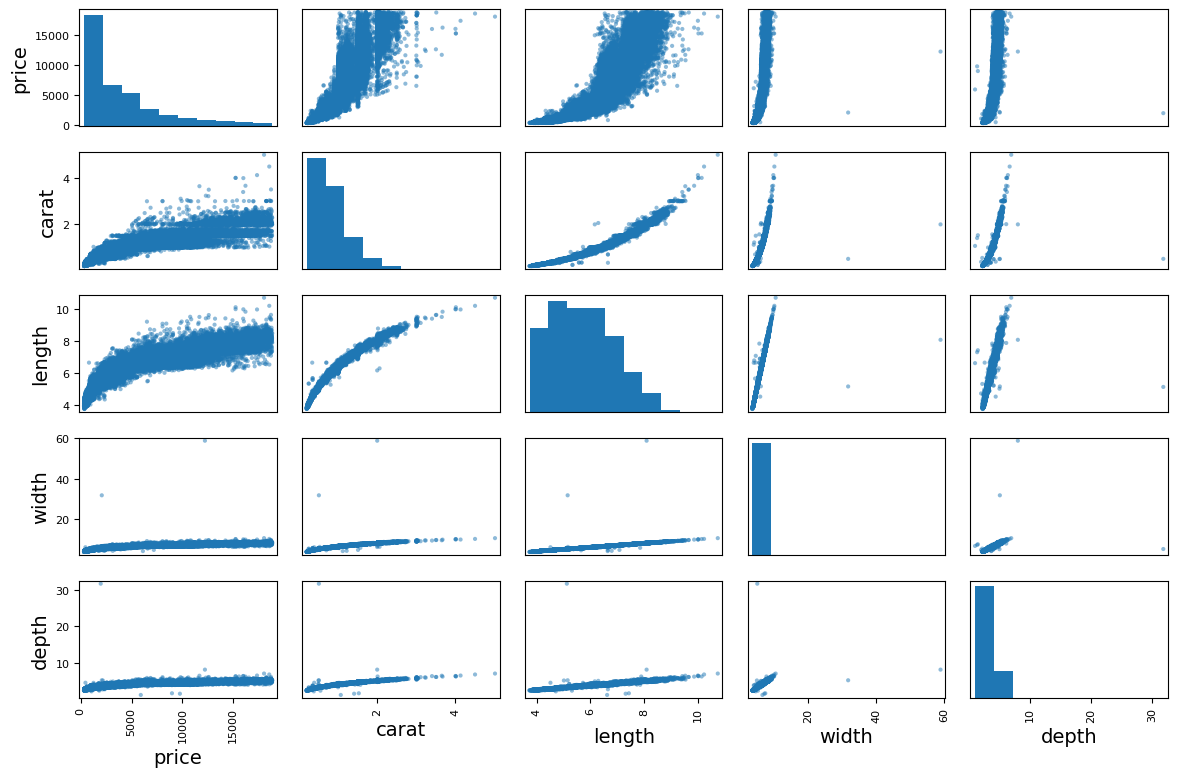

In [449]:
from pandas.plotting import scatter_matrix

attributes = ["price", "carat", "length",
              "width","depth"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

# Looking at distribution of Price wrt other columns

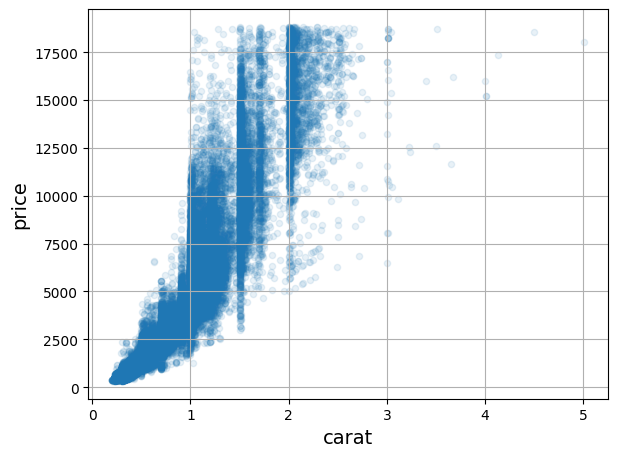

In [450]:
data.plot(kind="scatter", x="carat", y="price",
             alpha=0.1, grid=True)
save_fig("price_vs_carat_scatterplot")  # extra code
plt.show()

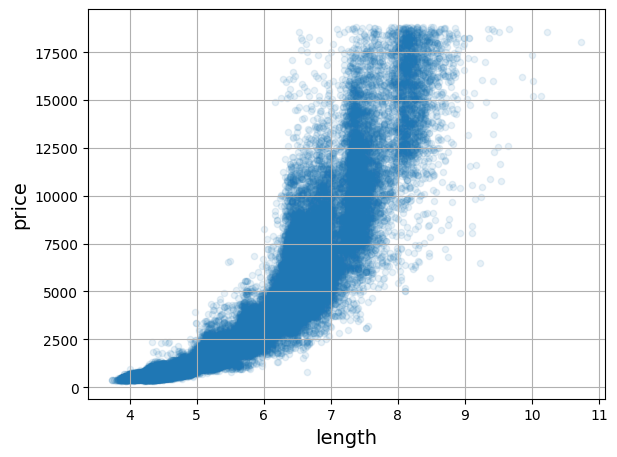

In [451]:
data.plot(kind="scatter", x="length", y="price",
             alpha=0.1, grid=True)
save_fig("price_vs_length_scatterplot")  # extra code
plt.show()

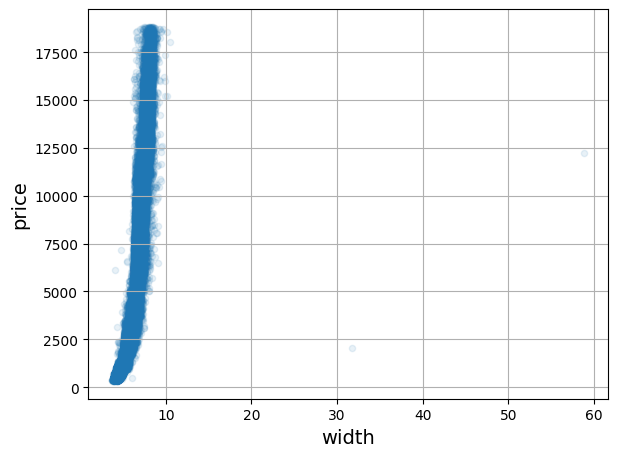

In [453]:
data.plot(kind="scatter", x="width", y="price",
             alpha=0.1, grid=True)
save_fig("width_vs_length_scatterplot")  # extra code
plt.show()

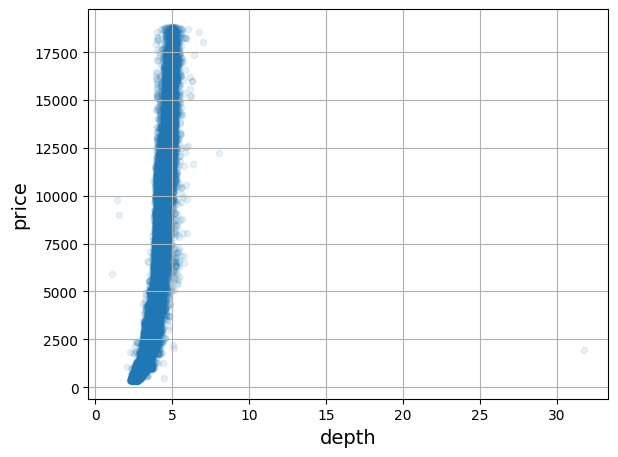

In [454]:
data.plot(kind="scatter", x="depth", y="price",
             alpha=0.1, grid=True)
save_fig("price_vs_depth_scatterplot")  # extra code
plt.show()

# Step 4: Data Preparation

Experimenting with Attribute Combinations
(Feature Engineering)

In [455]:
data['volume'] = data['length'] * data['width'] * data['depth']
data['aspect_ratio'] = data['length'] / data['width']
data['weight_volume_ratio'] = data['carat'] / data['volume']
data['carat_length_interaction'] = data['carat'] * data['length']
data['carat_width_interaction'] = data['carat'] * data['width']
data['normalized_depth_perc'] = (data['depth_perc'] - data['depth_perc'].min()) / (data['depth_perc'].max() - data['depth_perc'].min())

### Checking the correlation of new columns

In [457]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,carat,depth_perc,table,price,length,width,depth,volume,aspect_ratio,weight_volume_ratio,carat_length_interaction,carat_width_interaction,normalized_depth_perc
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048,0.978280,0.126739,0.206805,0.994472,0.988605,0.028259
depth_perc,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023,0.009039,0.053081,0.295392,0.011721,0.009886,1.000000
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483,0.167809,0.128755,0.244693,0.175621,0.172864,-0.295733
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206,0.904255,0.079764,0.143440,0.923801,0.919196,-0.010729
length,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435,0.958533,0.142516,0.186772,0.953899,0.948188,-0.025017
width,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744,0.977016,0.002743,0.133413,0.930496,0.947750,-0.029069
depth,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000,0.951912,0.113000,0.169296,0.935246,0.932094,0.095023
volume,0.978280,0.009039,0.167809,0.904255,0.958533,0.977016,0.951912,1.000000,0.041384,0.128187,0.973644,0.989487,0.009039
aspect_ratio,0.126739,0.053081,0.128755,0.079764,0.142516,0.002743,0.113000,0.041384,1.000000,0.283877,0.126658,0.075531,0.053081
weight_volume_ratio,0.206805,0.295392,0.244693,0.143440,0.186772,0.133413,0.169296,0.128187,0.283877,1.000000,0.185929,0.165460,0.295392


## Create a Test Set

#### Approach-1 : Simple Shuffle and Split

In [435]:
# import numpy as np

# def shuffle_and_split_data(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
# train_set, test_set = shuffle_and_split_data(data, 0.2)
# print("training dataset size:",len(train_set))
# print("testing dataset size:",len(test_set))

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [240]:
np.random.seed(42)

#### Approach-2: Splitting using hash-seed to remove randomness when the kernel restarts

In [241]:
# from zlib import crc32

# def is_id_in_test_set(identifier, test_ratio):
#     return crc32(np.int64(identifier)) < test_ratio * 2**32

# def split_data_with_id_hash(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

# data_with_id = data.reset_index()  # adds an `index` column
# train_set, test_set = split_data_with_id_hash(data_with_id, 0.2, "index")

Approach-3: Splitting using sklearn library

In [38]:
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

#### Approach-4: Stratified Sampling
Take the most important feature and make a split such that the distribution of the column is similar in both train and test set.

In [436]:
# data['carat_cat'] = pd.cut(data['carat'],
#                            bins=[0., 0.5, 1.0, 1.5, 2.0, np.inf],
#                            labels=[1, 2, 3, 4, 5])
# data['carat_cat'].value_counts()

,count
carat_cat,
1,18932
2,17502
3,12051
4,3552
5,1883


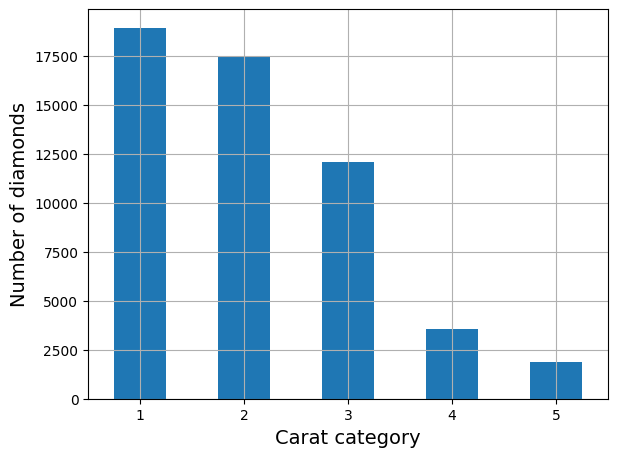

In [437]:
# data["carat_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
# plt.xlabel("Carat category")
# plt.ylabel("Number of diamonds")
# save_fig("price_carat_cat_bar_plot")  # extra code
# plt.show()

In [438]:
# from sklearn.model_selection import StratifiedShuffleSplit

# splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# strat_splits = []
# for train_index, test_index in splitter.split(data, data["carat_cat"]):
#     strat_train_set_n = data.iloc[train_index]
#     strat_test_set_n = data.iloc[test_index]
#     strat_splits.append([strat_train_set_n, strat_test_set_n])

# strat_train_set, strat_test_set = strat_splits[0]

Alternate Approach 4

In [185]:
# strat_train_set, strat_test_set = train_test_split(data, test_size=0.2, stratify = data["carat_cat"], random_state=42)

In [186]:
# strat_test_set["carat_cat"].value_counts() / len(strat_test_set)

,count
carat_cat,
1,0.351076
2,0.324648
3,0.223479
4,0.065838
5,0.034959


In [439]:
# # extra code – computes the data for Figure 2–10

# def carat_cat_proportions(data):
#     return data["carat_cat"].value_counts() / len(data)

# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# compare_props = pd.DataFrame({
#     "Overall %": carat_cat_proportions(data),
#     "Stratified %": carat_cat_proportions(strat_test_set),
#     "Random %": carat_cat_proportions(test_set),
# }).sort_index()

# compare_props.index.name = "Carat Category"
# compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
#                                    compare_props["Overall %"] - 1)
# compare_props["Rand. Error %"] = (compare_props["Random %"] /
#                                   compare_props["Overall %"] - 1)
# (compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Carat Category,,,,,
1,35.11,35.11,34.69,-0.01,-1.20
2,32.46,32.46,32.98,0.02,1.62
3,22.35,22.35,22.15,-0.01,-0.88
4,6.59,6.58,6.62,-0.06,0.51
5,3.49,3.50,3.55,0.11,1.70


In [440]:
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop("carat_cat", axis=1, inplace=True)

<ipython-input-440-87e3af5e9207>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("carat_cat", axis=1, inplace=True)
<ipython-input-440-87e3af5e9207>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("carat_cat", axis=1, inplace=True)


In [252]:
# data = strat_train_set.drop("price", axis=1)
# price_labels = strat_train_set["price"].copy()

## Data Cleaning

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   carat                     53920 non-null  float64
 1   cut                       53920 non-null  object 
 2   color                     53920 non-null  object 
 3   clarity                   53920 non-null  object 
 4   depth_perc                53920 non-null  float64
 5   table                     53920 non-null  float64
 6   price                     53920 non-null  int64  
 7   length                    53920 non-null  float64
 8   width                     53920 non-null  float64
 9   depth                     53920 non-null  float64
 10  volume                    53920 non-null  float64
 11  aspect_ratio              53920 non-null  float64
 12  weight_volume_ratio       53920 non-null  float64
 13  carat_length_interaction  53920 non-null  float64
 14  carat_width

## As we can see that there are no null values, hence, no imputation or row/column drop is required.

In [275]:
data.describe()

,carat,depth_perc,table,price,length,width,depth,volume,aspect_ratio,weight_volume_ratio,carat_length_interaction,carat_width_interaction,normalized_depth_perc
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,129.897567,0.999425,0.006127,5.090691,5.090033,0.520820
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,78.219789,0.011666,0.000178,4.050480,4.067610,0.039787
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,0.137351,0.000521,0.746000,0.736000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.189759,0.992625,0.006048,1.880000,1.884000,0.500000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180,0.995745,0.006117,4.018000,4.025000,0.522222
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,170.846415,1.006944,0.006190,6.801600,6.801600,0.541667
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060,1.615572,0.022647,53.807400,117.800000,1.000000


## Numerical Columns

### Detecting and Treating Outliers using Isolation Forest since the data is highly skewed

In [458]:
X = data.select_dtypes(include=[np.number])

In [459]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [460]:
outlier_pred

array([-1, -1, -1, ...,  1,  1,  1])

In [461]:
pd.DataFrame(outlier_pred).value_counts()

,count
0,
1,45726
-1,8194


# Code for dropping outliers

In [462]:
data = data.iloc[outlier_pred == 1]

## Categorical Columns

Now let's preprocess the categorical input features, `cut`, `color`, `clarity`

In [463]:
data_cat = data[['cut', 'color', 'clarity']]
data_cat.head(8)

,cut,color,clarity
3,Premium,I,VS2
4,Good,J,SI2
7,Very Good,H,SI1
10,Good,J,SI1
13,Ideal,J,SI2
15,Premium,E,I1
16,Ideal,I,SI2
17,Good,J,SI1


In [464]:
data['cut'].value_counts()

,count
cut,
Ideal,19899
Premium,11687
Very Good,10156
Good,3607
Fair,377


In [465]:
data['color'].value_counts()

,count
color,
G,9912
E,8643
F,8286
H,6751
D,6132
I,4073
J,1929


In [466]:
data['clarity'].value_counts()

,count
clarity,
SI1,11204
VS2,10670
VS1,7115
SI2,6974
VVS2,4438
VVS1,3296
IF,1658
I1,371


## Ordinal encoding

In [283]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(data_cat)

## One-hot encoding: Not Sparsed

In [467]:
# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder(sparse_output=False)
# data_cat_1hot = cat_encoder.fit_transform(data_cat)
# data_cat_1hot

## Feature scaling

In [284]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
width_min_max_scaled = min_max_scaler.fit_transform(data[['width']])

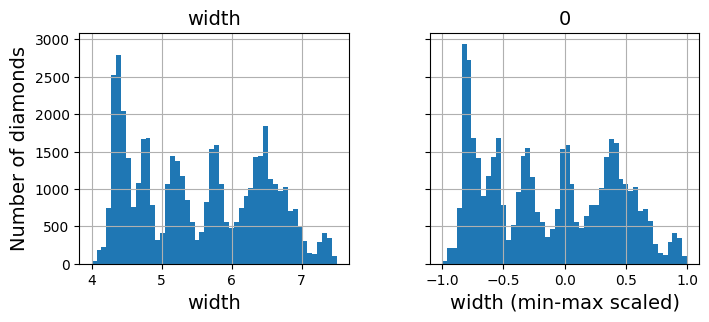

In [285]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data[['width']].hist(ax=axs[0], bins=50)
pd.DataFrame(width_min_max_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("width")
axs[1].set_xlabel("width (min-max scaled)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

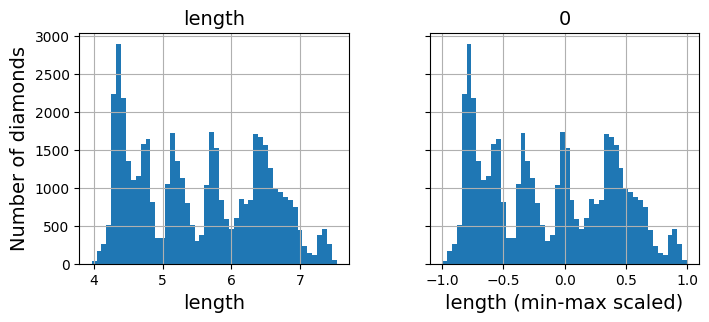

In [470]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
length_min_max_scaled = min_max_scaler.fit_transform(data[['length']])
data[['length']].hist(ax=axs[0], bins=50)
pd.DataFrame(length_min_max_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("length")
axs[1].set_xlabel("length (min-max scaled)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

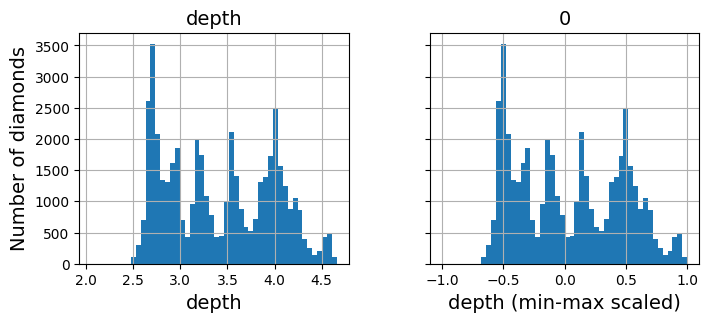

In [471]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
depth_min_max_scaled = min_max_scaler.fit_transform(data[['depth']])
data[['depth']].hist(ax=axs[0], bins=50)
pd.DataFrame(depth_min_max_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("depth")
axs[1].set_xlabel("depth (min-max scaled)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

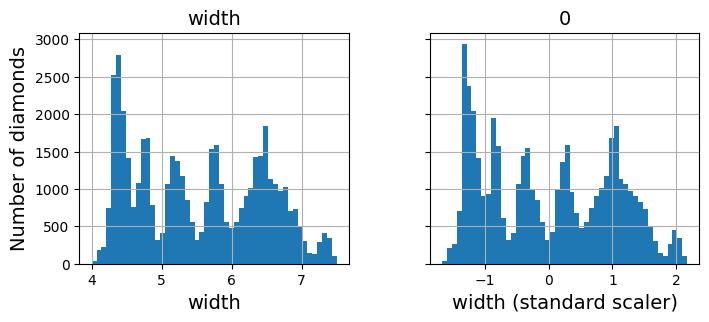

In [286]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
width_std_scaled = std_scaler.fit_transform(data[['width']])
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data[['width']].hist(ax=axs[0], bins=50)
pd.DataFrame(width_std_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("width")
axs[1].set_xlabel("width (standard scaler)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

Since there is no major change among min-max and standard scaler distribution. We can go ahead with Standard Scaler.  

Similarity using KMeans clustering

In [288]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.metrics.pairwise import rbf_kernel
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [289]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [292]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(data[["length", "width"]],
                                           sample_weight=data['carat'])

for set_ in (strat_train_set, strat_test_set):
    set_.drop("carat_cat", axis=1, inplace=True)

In [293]:
similarities[:3].round(2)

array([[0.  , 0.18, 0.  , 0.95, 0.01, 0.  , 0.57, 0.  , 0.  , 0.07],
       [0.  , 0.29, 0.  , 1.  , 0.02, 0.  , 0.73, 0.  , 0.  , 0.13],
       [0.  , 0.11, 0.  , 0.85, 0.  , 0.  , 0.43, 0.  , 0.  , 0.04]])

In [294]:
data.head()

,carat,cut,color,clarity,depth_perc,table,price,length,width,depth,volume,aspect_ratio,weight_volume_ratio,carat_length_interaction,carat_width_interaction,normalized_depth_perc
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.992908,0.006207,1.2180,1.2267,0.538889
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.997701,0.005971,1.3454,1.3485,0.563889
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081,0.990268,0.006144,1.0582,1.0686,0.525000
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,49.658700,0.992991,0.006041,1.2750,1.2840,0.583333
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71,51.515745,0.995423,0.006018,1.3485,1.3547,0.533333


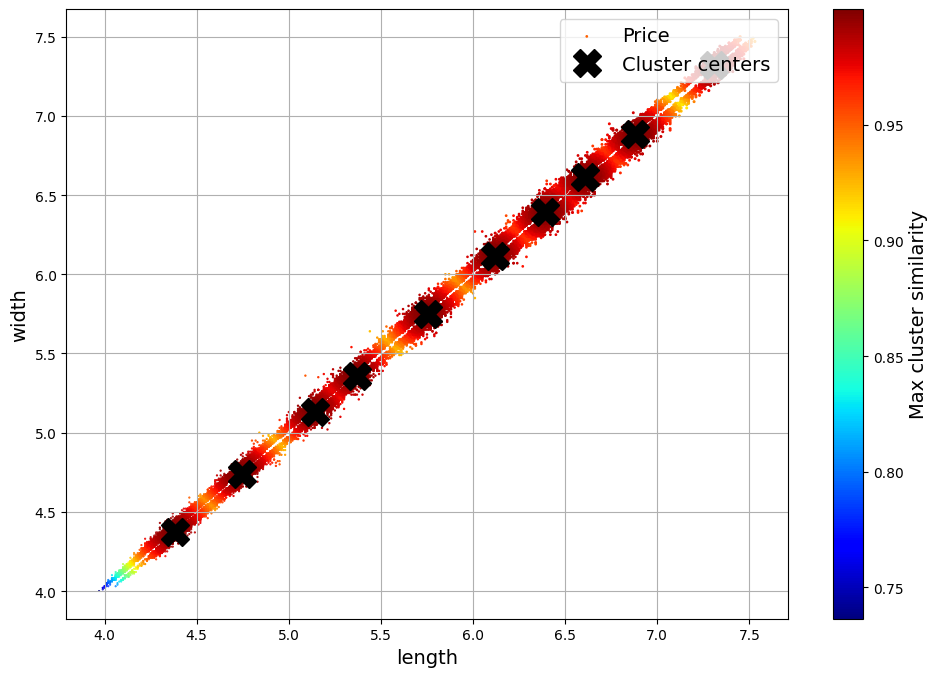

In [295]:
# extra code – this cell generates Figure 2–19
data["Max cluster similarity"] = similarities.max(axis=1)

data.plot(kind="scatter", x="length", y="width", grid=True,
                     s=data["carat"], label="Price",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

## Transformation Pipelines

Pipeline for using only the original dataset attributes: both numerical and categorical

In [472]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer

set_config(display='diagram')

num_pipeline = Pipeline([('std_scaler', StandardScaler()) ])

cat_pipeline = make_pipeline(OrdinalEncoder())

num_attribs = ['carat', 'depth_perc', 'table', 'price',
       'length', 'width', 'depth']
cat_attribs = ['cut', 'color', 'clarity',]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

data_prepared = preprocessing.fit_transform(data)

# extra code – shows that we can get a DataFrame out if we want
data_prepared_fr = pd.DataFrame(
    data_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=data.index)
data_prepared_fr.head(2)

,pipeline-1__carat,pipeline-1__depth_perc,pipeline-1__table,pipeline-1__price,pipeline-1__length,pipeline-1__width,pipeline-1__depth,pipeline-1__volume,pipeline-1__aspect_ratio,pipeline-1__weight_volume_ratio,pipeline-1__carat_length_interaction,pipeline-1__carat_width_interaction,pipeline-1__normalized_depth_perc,pipeline-2__cut,pipeline-2__color,pipeline-2__clarity
3,-1.188046,0.564184,0.353901,-1.005763,-1.441316,-1.42210,-1.377817,-1.209557,-0.715858,0.816501,-1.105919,-1.104894,0.564184,3.0,5.0,5.0
4,-1.128586,1.357678,0.353901,-1.005386,-1.288171,-1.29011,-1.165603,-1.114000,-0.143663,-1.359776,-1.057183,-1.058232,1.357678,1.0,6.0,3.0


Pipeline for defining new feature engineered columns before training the model

In [333]:
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# from sklearn.compose import make_column_selector
# import numpy as np
# import pandas as pd

# # Custom Transformers
# class VolumeCalculator(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
#         return np.expand_dims(X[:, 0] * X[:, 1] * X[:, 2], axis=1)

#     def get_feature_names_out(self, input_features=None):
#         return ['volume']

# class AspectRatioCalculator(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
#         return np.expand_dims(X[:, 0] / X[:, 1], axis=1)

#     def get_feature_names_out(self, input_features=None):
#         return ['aspect_ratio']

# class InteractionCalculator(BaseEstimator, TransformerMixin):
#     def __init__(self, col1_idx=0, col2_idx=1):
#         self.col1_idx = col1_idx
#         self.col2_idx = col2_idx

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
#         return np.expand_dims(X[:, self.col1_idx] * X[:, self.col2_idx], axis=1)

#     def get_feature_names_out(self, input_features=None):
#         # Define a meaningful name for the interaction
#         return [f'col{self.col1_idx}_x_col{self.col2_idx}_interaction']

# # Numeric and Categorical Pipelines
# num_pipeline = Pipeline([
#     ('std_scaler', StandardScaler())
# ])

# cat_pipeline = make_pipeline(
#     OrdinalEncoder()
# )

# # Feature Engineering Pipelines
# feature_engineering = ColumnTransformer([
#     ('volume', Pipeline([
#         ('calculate_volume', VolumeCalculator()),
#         ('scale', StandardScaler())
#     ]), ['length', 'width', 'depth']),

#     ('aspect_ratio', Pipeline([
#         ('calculate_aspect_ratio', AspectRatioCalculator()),
#         ('scale', StandardScaler())
#     ]), ['length', 'width']),

#     ('carat_length_interaction', Pipeline([
#         ('calculate_carat_length_interaction', InteractionCalculator(col1_idx=0, col2_idx=1)),
#         ('scale', StandardScaler())
#     ]), ['carat', 'length']),

#     ('carat_width_interaction', Pipeline([
#         ('calculate_carat_width_interaction', InteractionCalculator(col1_idx=0, col2_idx=1)),
#         ('scale', StandardScaler())
#     ]), ['carat', 'width']),
# ])

# # Combine All Pipelines into One Preprocessing Pipeline
# preprocessing = ColumnTransformer([
#     # Original numeric and categorical pipelines
#     ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
#     ('cat', cat_pipeline, make_column_selector(dtype_include=object)),

#     # Feature engineering pipeline
#     ('feature_engineering', feature_engineering, [
#         'length', 'width', 'depth', 'carat'
#     ])
# ])

# # Fit and transform the data
# preprocessed_data = preprocessing.fit_transform(data)

# # Combine Transformed Data into a DataFrame
# transformed_columns = preprocessing.get_feature_names_out()
# transformed_df = pd.DataFrame(preprocessed_data, columns=transformed_columns)

# # View Results
# transformed_df.head()


,num__carat,num__depth_perc,num__table,num__price,num__length,num__width,num__depth,num__volume,num__aspect_ratio,num__weight_volume_ratio,...,num__carat_width_interaction,num__normalized_depth_perc,num__Max cluster similarity,cat__cut,cat__color,cat__clarity,feature_engineering__volume__volume,feature_engineering__aspect_ratio__aspect_ratio,feature_engineering__carat_length_interaction__col0_x_col1_interaction,feature_engineering__carat_width_interaction__col0_x_col1_interaction
0,-1.188046,0.564184,0.353901,-1.005763,-1.441316,-1.422100,-1.377817,-1.209557,-0.715858,0.816501,...,-1.104894,0.564184,-1.852612,3.0,5.0,5.0,-1.209557,-0.715858,-1.105919,-1.104894
1,-1.128586,1.357678,0.353901,-1.005386,-1.288171,-1.290110,-1.165603,-1.114000,-0.143663,-1.359776,...,-1.058232,1.357678,0.692767,1.0,6.0,3.0,-1.114000,-0.143663,-1.057183,-1.058232
2,-1.277235,0.123354,-1.104992,-1.004632,-1.583523,-1.554090,-1.554663,-1.290592,-1.031021,0.233744,...,-1.165462,0.123354,-7.099354,4.0,4.0,2.0,-1.290592,-1.031021,-1.167049,-1.165462
3,-1.158316,1.974840,-1.104992,-1.003878,-1.386622,-1.367104,-1.200972,-1.155563,-0.705967,-0.711197,...,-1.082942,1.974840,-0.487557,1.0,6.0,2.0,-1.155563,-0.705967,-1.084114,-1.082942
4,-1.128586,0.387852,-1.591289,-1.001993,-1.277232,-1.268111,-1.236341,-1.121389,-0.415571,-0.929799,...,-1.055857,0.387852,0.762874,2.0,6.0,3.0,-1.121389,-0.415571,-1.055997,-1.055857


## Stratified sampling for Training-Test set split

In [484]:
data['carat_cat'] = pd.cut(data['carat'],
                           bins=[0., 0.5, 0.7, 0.9, 1.1, 1.4, 2.0],
                           labels=[1, 2, 3, 4, 5,6])
data['carat_cat'].value_counts()

strat_train_set, strat_test_set = train_test_split(
    data, test_size=0.2, stratify = data["carat_cat"], random_state=42)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("carat_cat", axis=1, inplace=True)

In [485]:
data_train = strat_train_set.drop("price", axis=1)
data_labels = strat_train_set["price"].copy()

In [486]:
data_train.head()

,carat,cut,color,clarity,depth_perc,table,length,width,depth,volume,aspect_ratio,weight_volume_ratio,carat_length_interaction,carat_width_interaction,normalized_depth_perc
48553,0.70,Very Good,D,SI2,60.9,60.0,5.68,5.72,3.47,112.738912,0.993007,0.006209,3.9760,4.0040,0.497222
8092,1.25,Premium,G,SI2,61.1,58.0,6.96,6.91,4.24,203.916864,1.007236,0.006130,8.7000,8.6375,0.502778
47673,0.51,Ideal,D,VS2,62.4,55.0,5.14,5.11,3.20,84.049280,1.005871,0.006068,2.6214,2.6061,0.538889
40831,0.46,Very Good,G,VS2,61.3,56.0,4.98,5.00,3.06,76.194000,0.996000,0.006037,2.2908,2.3000,0.508333
53060,0.72,Very Good,E,SI1,63.1,60.0,5.65,5.70,3.58,115.293900,0.991228,0.006245,4.0680,4.1040,0.558333


## Pre-processing training and test data and fitting model

In [476]:
# Fit and transform the data
preprocessed_data = preprocessing.fit_transform(data_train)

# Combine Transformed Data into a DataFrame
transformed_columns = preprocessing.get_feature_names_out()
transformed_df = pd.DataFrame(preprocessed_data, columns=transformed_columns)

# View Results
transformed_df.head()

,pipeline-1__carat,pipeline-1__depth_perc,pipeline-1__table,pipeline-1__length,pipeline-1__width,pipeline-1__depth,pipeline-1__volume,pipeline-1__aspect_ratio,pipeline-1__weight_volume_ratio,pipeline-1__carat_length_interaction,pipeline-1__carat_width_interaction,pipeline-1__normalized_depth_perc,pipeline-2__cut,pipeline-2__color,pipeline-2__clarity
0,0.030483,-0.760509,1.326166,0.177374,0.216592,0.107325,0.004954,-0.706315,0.842557,-0.051253,-0.041260,-0.760509,4.0,0.0,3.0
1,1.665293,-0.583896,0.353928,1.577178,1.525331,1.468652,1.682471,0.995522,0.106849,1.755532,1.733605,-0.583896,3.0,3.0,3.0
2,-0.534270,0.564091,-1.104430,-0.413169,-0.454274,-0.370023,-0.522886,0.832257,-0.470653,-0.569346,-0.576726,0.564091,2.0,0.0,5.0
3,-0.682889,-0.407282,-0.618311,-0.588144,-0.575250,-0.617537,-0.667410,-0.348338,-0.755756,-0.695790,-0.693978,-0.407282,4.0,3.0,5.0
4,0.089930,1.182237,1.326166,0.144566,0.194597,0.301801,0.051961,-0.919081,1.176270,-0.016066,-0.002955,1.182237,4.0,1.0,2.0


# Select and Train a Model

In [388]:
from sklearn.preprocessing import LabelEncoder

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data[col] = label_encoder.fit_transform(data[col])

# Defining the independent and dependent variables
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [389]:
X.head()

,carat,cut,color,clarity,depth_perc,table,length,width,depth,carat_cat
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,1
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,1
13,0.31,2,6,3,62.2,54.0,4.35,4.37,2.71,1
15,0.32,3,1,0,60.9,58.0,4.38,4.42,2.68,1
16,0.30,2,5,3,62.0,54.0,4.31,4.34,2.68,1


In [390]:
X.drop(columns=['carat_cat'],inplace = True)

## Model Training with train using simple pipelines
### And evaluating on test data

In [394]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

Model 1: Linear Regression

In [397]:
from sklearn.linear_model import LinearRegression

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])
pipeline_lr.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score

lr_rmses = -cross_val_score(pipeline_lr, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lr_rmses).describe()

,0
count,10.000000
mean,884.539758
std,22.799468
min,852.324399
25%,872.068464
50%,882.527382
75%,891.324376
max,928.742363


Model 2: Lasso Regression

In [398]:
from sklearn. linear_model import Lasso

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso(random_state=42))])
pipeline_lasso.fit(X_train,y_train)

lasso_rmses = -cross_val_score(pipeline_lasso, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lasso_rmses).describe()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.559e+08, tolerance: 2.350e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.299e+08, tolerance: 2.117e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.255e+08, tolerance: 2.112e

,0
count,10.000000
mean,886.657426
std,22.781932
min,854.473639
25%,873.484529
50%,885.095773
75%,894.338275
max,929.741163


Model 3: Decision Tree Regression

In [399]:
from sklearn.tree import DecisionTreeRegressor

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor(random_state=42))])
pipeline_dt.fit(X_train,y_train)

dt_rmses = -cross_val_score(pipeline_dt, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(dt_rmses).describe()

,0
count,10.000000
mean,464.802518
std,17.368677
min,427.876782
25%,456.858041
50%,467.175544
75%,471.067173
max,490.907561


Model 4: Random forest Regressor

In [400]:
from sklearn.ensemble import RandomForestRegressor

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor(random_state=42))])
pipeline_rf.fit(X_train,y_train)

forest_rmses = -cross_val_score(pipeline_rf, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,342.452391
std,11.202799
min,317.210572
25%,339.521191
50%,340.904779
75%,351.884711
max,354.688202


# Step 6: Model Evaluation

Training Set Evaluations

In [ ]:
print("Linear Regression RMSE:", lr_rmses.mean())
print("Lasso Regression RMSE:", lasso_rmses.mean())
print("Decision Tree Regression RMSE:", dt_rmses.mean())
print("Random Forest Regression RMSE:", forest_rmses.mean())

Test Set Evaluations

In [ ]:
print(mean_squared_error(pipeline_lr.predict(X_test), y_test,squared=False))
print(mean_squared_error(pipeline_lasso.predict(X_test), y_test,squared=False))
print(mean_squared_error(pipeline_dt.predict(X_test), y_test,squared=False))
print(mean_squared_error(pipeline_rf.predict(X_test), y_test,squared=False))

# Step 7: Model Selection

Since the Random forest model has the best performance (lowest RMSE), our final model will be Random Forest Model.

# Step 8: Fine Tuning

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define your pipeline
pipeline_rf = Pipeline([
    ("scalar4", StandardScaler()),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# Define the parameter grid for fine-tuning
param_grid = [
    {
        'random_forest__n_estimators': [100, 200, 300],  # Number of trees
        'random_forest__max_features': ['auto', 'sqrt', 'log2'],  # Feature selection methods
        'random_forest__max_depth': [None, 10, 20],  # Depth of the trees
        'random_forest__min_samples_split': [2, 5, 10],  # Minimum samples for split
        'random_forest__min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    }
]

# Perform the Grid Search
grid_search = GridSearchCV(
    pipeline_rf,
    param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1,  # Parallelize the search
)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and performance
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

# Evaluate the best model on the test data (if applicable)
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

## Saving final model

In [ ]:
import joblib

joblib.dump(final_model, "my_diamond_price_prediction_model.pkl")